<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/MNISTClassificatoinSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data = datasets.load_digits()


In [3]:
type(data)

sklearn.utils._bunch.Bunch

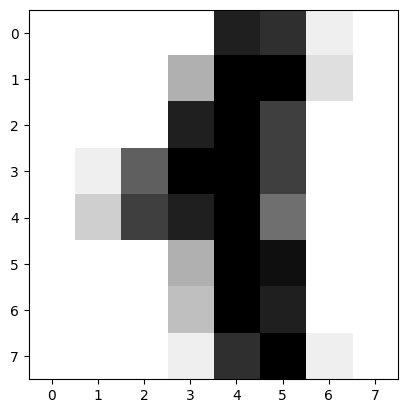

In [4]:
plt.subplot()
plt.imshow(data.images[11], cmap=plt.cm.gray_r)

In [5]:
data.target[11]

1

In [6]:
counter=0
dict1=dict()
nums=data.target
nums=set(nums)
print(nums)
for i in range(len(data.images)):
  if data.target[i]==0:
     counter+=1
dict1[0]=counter
print (dict1)



{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0: 178}


In [7]:
# counet=0
dict2=dict()
nums=data.target
nums=set(nums)
nums=list(nums)
# print(nums)
for i in nums:
  count=0
  for j in range(len(data.images)):
    if  data.target[j]==i:
      count+=1
  dict2[i]=count
print(dict2)

{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


In [8]:
images_and_labels = list(zip(data.images, data.target))

In [9]:
images_and_labels[110]

(array([[ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
        [ 0.,  0., 11., 15.,  3.,  0.,  0.,  0.],
        [ 0.,  7., 15.,  4.,  0.,  0.,  0.,  0.],
        [ 0., 12., 11.,  1.,  3.,  8.,  2.,  0.],
        [ 0.,  4., 12., 15., 15., 16.,  9.,  0.],
        [ 0.,  0.,  0.,  8., 16.,  8.,  2.,  0.],
        [ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 12.,  9.,  0.,  0.,  0.]]),
 4)

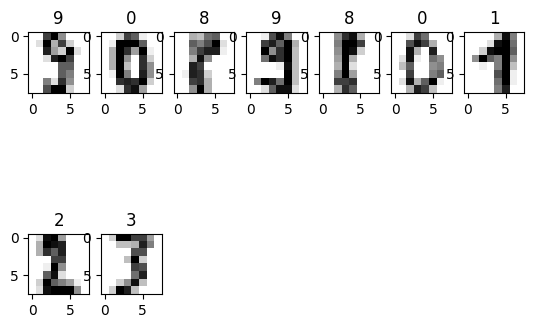

In [10]:
for i, (image, label) in enumerate(images_and_labels[125:134]):
    plt.subplot(2, 7, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

In [11]:
np.shape(data.images)

(1797, 8, 8)

In [12]:

len(data.images)

1797

In [13]:
X = data.images.reshape((len(data.images), -1))

In [14]:
np.shape(X)

(1797, 64)

In [15]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [16]:
y = data.target

In [17]:
len(y)

1797

In [18]:
from sklearn.svm import SVC
SVC

sklearn.svm._classes.SVC

In [19]:
svm_classifier = SVC()
#SVC() is Constractor of SVC class

In [20]:
svm_classifier.fit(X, y)

SVC()

Text(0.5, 1.0, '1')

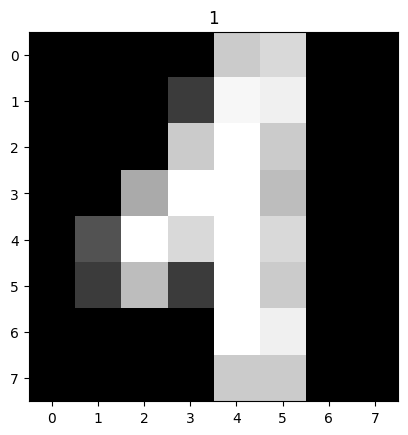

In [21]:
plt.subplot()
plt.imshow(data.images[200], cmap=plt.cm.Greys_r)
plt.title(data.target[200])

In [22]:
svm_classifier.predict([X[200]])

array([1])

In [23]:
Train_mount=int(len(data.images)*.76)
Train_mount

1365

In [24]:
Test_mount=len(data.images)-Train_mount
Test_mount

432

In [25]:
svm_new = SVC()
svm_new.fit(X[:Train_mount], y[:Train_mount])

SVC()

In [26]:
pridcted_image=svm_new.predict(X[Train_mount:])

In [27]:
Real_image=y[Train_mount:]

In [28]:
correct_val=0
for i in range(Test_mount):
  if pridcted_image[i]==Real_image[i]:
    correct_val+=1
print ((correct_val/Test_mount)*100)

95.13888888888889


In [54]:
corrected_val_list=list()
for i in range(1,100):
  prc=i/100
  # print (prc)
  Train_mount=int(len(data.images)*prc)
  Test_mount=len(data.images)-Train_mount
  svm_new = SVC()
  svm_new.fit(X[:Train_mount], y[:Train_mount])
  pridcted_image=svm_new.predict(X[Train_mount:])
  Real_image=y[Train_mount:]
  correct_val=0
  for j in range(Test_mount):
    if pridcted_image[j]==Real_image[j]:
      correct_val+=1
  corrected_val_list.append((correct_val/Test_mount)*100)


In [55]:
print(corrected_val_list)

[60.0, 77.1282633371169, 79.0137614678899, 80.41714947856316, 82.08430913348947, 82.89940828402366, 81.39952153110048, 81.01571946795647, 81.54034229828851, 81.21137206427689, 82.125, 81.79519595448798, 81.52173913043478, 81.63001293661061, 83.57329842931938, 84.63576158940397, 86.72922252010724, 87.38127544097694, 88.66758241758241, 89.221140472879, 90.0, 90.5848787446505, 91.61849710982659, 91.65446559297217, 92.80415430267063, 93.15789473684211, 92.98780487804879, 93.19938176197836, 93.96551724137932, 94.51510333863276, 94.75806451612904, 94.92635024549918, 94.93355481727575, 94.69250210614996, 95.03849443969204, 95.04778453518679, 94.88084730803178, 94.97757847533632, 95.07748404740201, 95.08804448563485, 95.19321394910462, 95.30201342281879, 95.1219512195122, 95.63058589870904, 95.75328614762387, 95.88053553038105, 95.90766002098636, 95.8288770053476, 95.85605234460196, 96.1067853170189, 96.14074914869465, 96.29200463499421, 96.09467455621302, 96.13059250302297, 96.04449938195303,

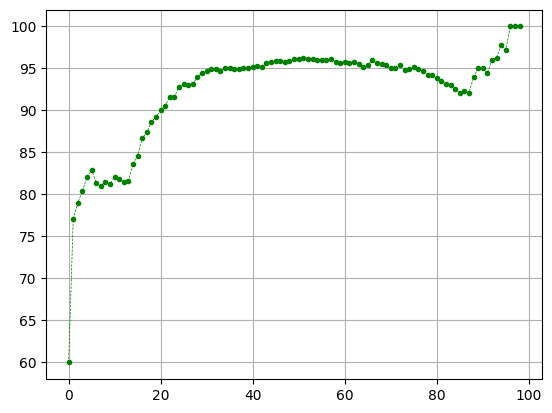

In [57]:
plt.plot(corrected_val_list, color='green', marker='o', linestyle='dashed',linewidth=.5, markersize=3)
plt.grid()


In [36]:
svm_new.predict([X[948]])

array([7])

In [37]:
data.target[9]

9

In [38]:
from sklearn import metrics

In [39]:
pridect_val = svm_new.predict(X[1000:])
real_val = y[1000:]
print(metrics.classification_report(real_val, pridect_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       0.99      1.00      0.99        80
           2       1.00      1.00      1.00        77
           3       0.99      1.00      0.99        79
           4       1.00      1.00      1.00        83
           5       0.99      1.00      0.99        82
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        80
           8       1.00      0.99      0.99        76
           9       1.00      0.98      0.99        81

    accuracy                           1.00       797
   macro avg       1.00      1.00      1.00       797
weighted avg       1.00      1.00      1.00       797



In [58]:
print(metrics.confusion_matrix(real_val, pridect_val))

[[79  0  0  0  0  0  0  0  0  0]
 [ 0 80  0  0  0  0  0  0  0  0]
 [ 0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0 79  0  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0  0]
 [ 0  0  0  0  0 82  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0]
 [ 0  1  0  0  0  0  0  0 75  0]
 [ 0  0  0  1  0  1  0  0  0 79]]
